In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_communication'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_communication
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_communication'].max()
Min = Mexico['review_scores_communication'].min()
Limites = [Min, Max]
Limites

[3.86, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.1400000000000001

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.07265945255567237

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.86, 5, 16)
intervalos

array([3.86 , 3.936, 4.012, 4.088, 4.164, 4.24 , 4.316, 4.392, 4.468,
       4.544, 4.62 , 4.696, 4.772, 4.848, 4.924, 5.   ])

In [11]:
# Creamos las categorías
categorias = [
    "Muy mala comunicación",
    "Mala comunicación",
    "Comunicación deficiente",
    "Poca comunicación",
    "Comunicación regular",
    "Comunicación aceptable",
    "Comunicación básica",
    "Comunicación fluida",
    "Comunicación buena",
    "Muy buena comunicación",
    "Excelente comunicación",
    "Comunicación destacada",
    "Comunicación sobresaliente",
    "Comunicación impecable",
    "Comunicación perfecta"
]



In [12]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_communication'] = pd.cut ( x = Mexico ['review_scores_communication'], bins = intervalos, labels = categorias )
Mexico['review_scores_communication']

0             Comunicación perfecta
1        Comunicación sobresaliente
2            Comunicación impecable
3             Comunicación perfecta
4            Comunicación destacada
                    ...            
26577         Comunicación perfecta
26578         Comunicación perfecta
26579         Comunicación perfecta
26580         Comunicación perfecta
26581         Comunicación perfecta
Name: review_scores_communication, Length: 26582, dtype: category
Categories (15, object): ['Muy mala comunicación' < 'Mala comunicación' < 'Comunicación deficiente' < 'Poca comunicación' ... 'Comunicación destacada' < 'Comunicación sobresaliente' < 'Comunicación impecable' < 'Comunicación perfecta']

In [13]:
table1 = freq_tbl(Mexico['review_scores_communication'])
table1

,review_scores_communication,frequency,percentage,cumulative_perc
0,Comunicación perfecta,15250,0.573696,0.573783
1,Comunicación impecable,4784,0.179971,0.753781
2,Comunicación sobresaliente,2250,0.084644,0.838438
3,Comunicación destacada,1481,0.055714,0.894161
4,Excelente comunicación,846,0.031826,0.925991
5,Muy buena comunicación,512,0.019261,0.945255
6,Comunicación buena,479,0.018020,0.963278
7,Mala comunicación,272,0.010232,0.973512
8,Comunicación fluida,223,0.008389,0.981902
9,Comunicación básica,192,0.007223,0.989126


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_communication,frequency
0,Comunicación perfecta,15250
1,Comunicación impecable,4784
2,Comunicación sobresaliente,2250
3,Comunicación destacada,1481
4,Excelente comunicación,846
5,Muy buena comunicación,512
6,Comunicación buena,479
7,Mala comunicación,272
8,Comunicación fluida,223
9,Comunicación básica,192


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_communication')
Filtro_index

,frequency
review_scores_communication,
Comunicación perfecta,15250
Comunicación impecable,4784
Comunicación sobresaliente,2250
Comunicación destacada,1481
Excelente comunicación,846
Muy buena comunicación,512
Comunicación buena,479
Mala comunicación,272
Comunicación fluida,223


Text(0, 0.5, 'Frecuencia')

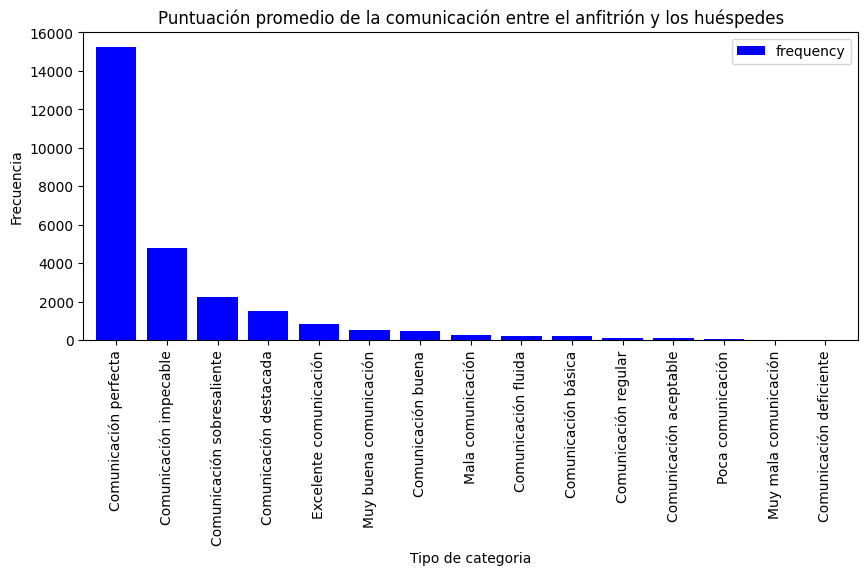

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de la comunicación entre el anfitrión y los huéspedes')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')